In [1]:
import pandas as pd
import numpy as np

In [2]:
train_X = pd.read_excel('train_X.xlsx', index_col=0)
train_Y = pd.read_excel('train_Y.xlsx', index_col=0)
test_X  = pd.read_excel('test_X.xlsx',  index_col=0)
test_Y  = pd.read_excel('test_Y.xlsx',  index_col=0)

In [3]:
colu = list(train_X.columns)

In [4]:
num = [5,0,3,4,51,1,2,49,47,55,53,10,12,9,8,11,7,18,48,6]

In [5]:
train_X_10 = pd.DataFrame()
test_X_10 = pd.DataFrame()
for i in num[0:10]:
    train_X_10 = pd.concat((train_X_10, train_X[colu[i]]),axis=1)
    test_X_10 = pd.concat((test_X_10, test_X[colu[i]]),axis=1)

## 평가(머신러닝)

In [6]:
from pandas import Series
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#### XGBOOSTING

In [7]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pylab as pl
from sklearn.datasets import dump_svmlight_file

# print the JS visualization code to the notebook
shap.initjs()

In [8]:
train_X, test_X = train_X_10, test_X_10

dump_svmlight_file(train_X, train_Y['Final'], 'dtrain.svm', zero_based=True)
dump_svmlight_file(test_X, test_Y['Final'], 'dtest.svm', zero_based=True)
d_train = xgb.DMatrix('dtrain.svm')
d_test  = xgb.DMatrix('dtest.svm')

param = {'max_depth': 7, 'eta': 0.3, 'verbosity': 0, 'objective':'multi:softprob', 'num_class': 2} #'objective': 'multi:softprob'
model1 = xgb.train(param, d_train, 5000, evals = [(d_test, "test")], early_stopping_rounds=50)

[0]	test-mlogloss:0.46506
[1]	test-mlogloss:0.33506
[2]	test-mlogloss:0.25040
[3]	test-mlogloss:0.19281
[4]	test-mlogloss:0.14902
[5]	test-mlogloss:0.12020
[6]	test-mlogloss:0.09830
[7]	test-mlogloss:0.08284
[8]	test-mlogloss:0.07109
[9]	test-mlogloss:0.06057
[10]	test-mlogloss:0.05348
[11]	test-mlogloss:0.04547
[12]	test-mlogloss:0.04083
[13]	test-mlogloss:0.03735
[14]	test-mlogloss:0.03351
[15]	test-mlogloss:0.03189
[16]	test-mlogloss:0.02957
[17]	test-mlogloss:0.02789
[18]	test-mlogloss:0.02687
[19]	test-mlogloss:0.02476
[20]	test-mlogloss:0.02332
[21]	test-mlogloss:0.02181
[22]	test-mlogloss:0.02089
[23]	test-mlogloss:0.01980
[24]	test-mlogloss:0.01946
[25]	test-mlogloss:0.01835
[26]	test-mlogloss:0.01785
[27]	test-mlogloss:0.01690
[28]	test-mlogloss:0.01608
[29]	test-mlogloss:0.01512
[30]	test-mlogloss:0.01469
[31]	test-mlogloss:0.01400
[32]	test-mlogloss:0.01326
[33]	test-mlogloss:0.01291
[34]	test-mlogloss:0.01248
[35]	test-mlogloss:0.01237
[36]	test-mlogloss:0.01176
[37]	test-m

In [9]:
import shap
from shap import TreeExplainer

In [10]:
X = pd.concat([train_X,test_X])
Y = pd.concat([train_Y,test_Y])

In [11]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X,Y.values)

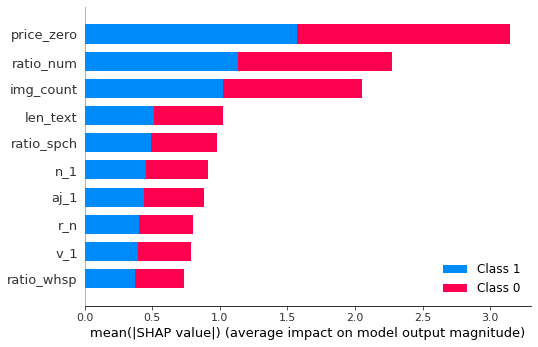

In [12]:
shap.summary_plot(shap_values, X, feature_names = train_X.columns)

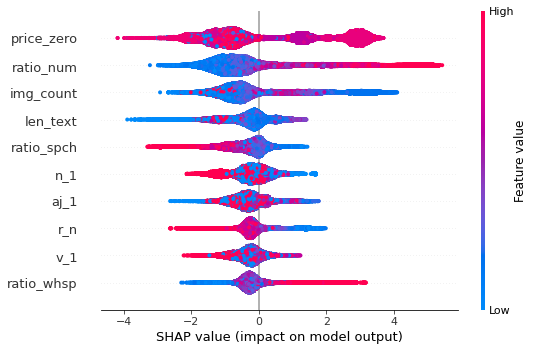

In [13]:
shap.summary_plot(shap_values[1], X, feature_names = train_X.columns)

In [19]:
b = ['price_zero','ratio_num','img_count','len_text','ratio_spch','n_1','aj_1','r_n','v_1','ratio_whsp']

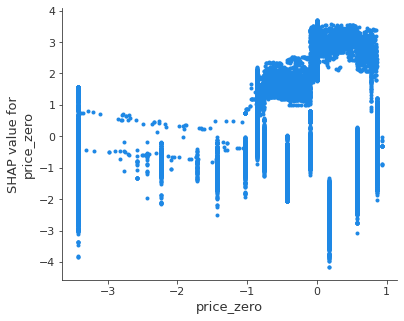

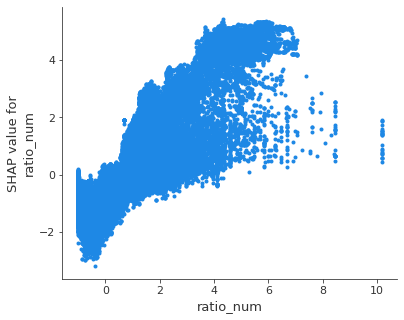

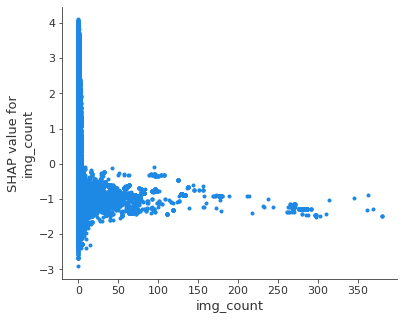

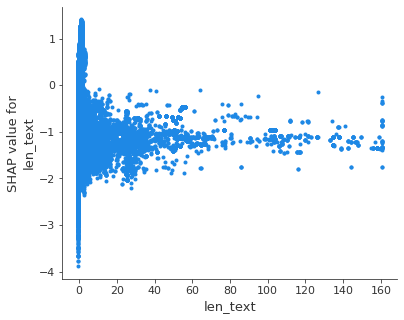

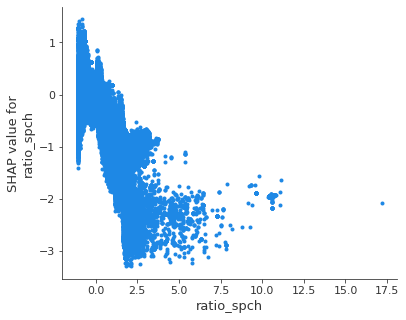

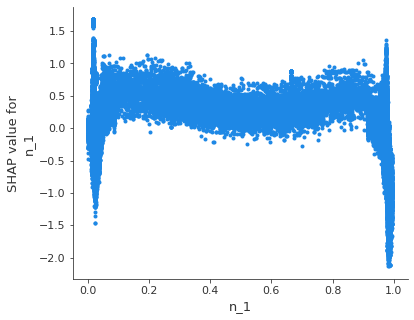

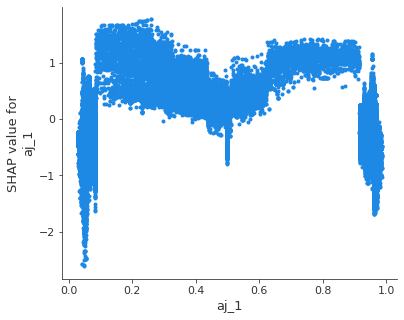

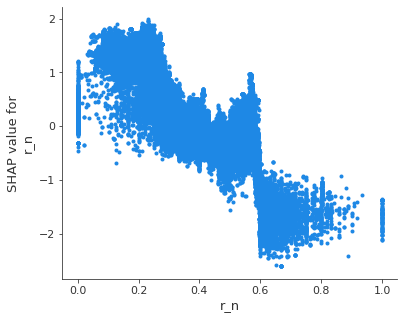

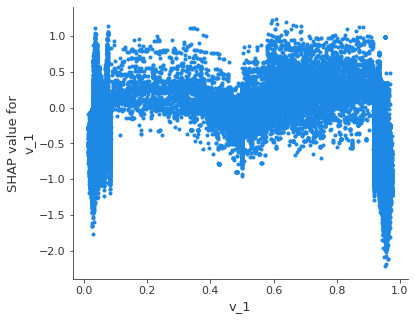

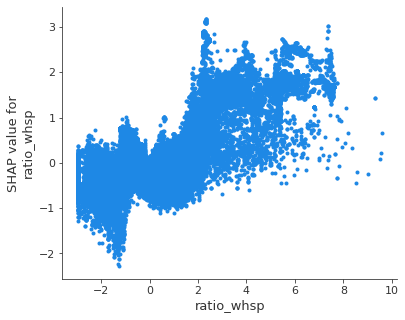

In [21]:
for i in b:
    shap.dependence_plot(i, shap_values[1], features = X, feature_names = train_X.columns, interaction_index = None)